In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:

from sklearn.preprocessing import StandardScaler

# Select features
selected_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [9]:
from sklearn.cluster import KMeans

# Determine the number of clusters (K)
kmeans = KMeans(n_clusters=4)

# Fit K-Means to the scaled data
kmeans.fit(scaled_features)

# Assign cluster labels to the original dataset
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


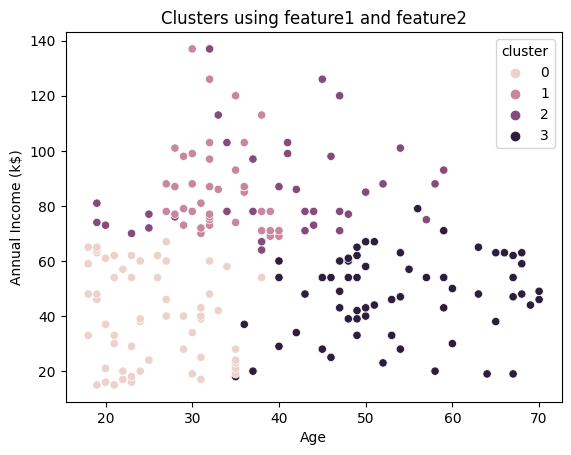

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='cluster', data=data)
plt.title('Clusters using feature1 and feature2')
plt.show()

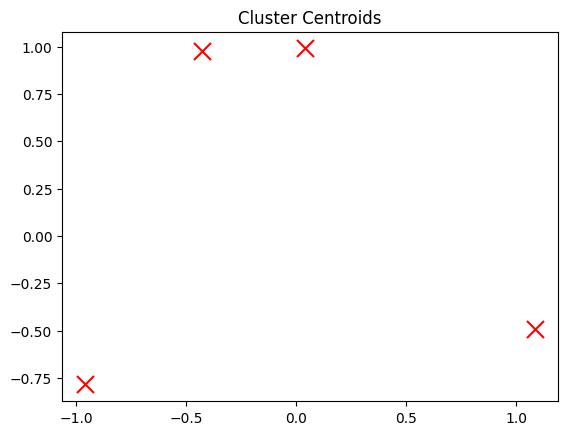

In [12]:
# Cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=150)
plt.title('Cluster Centroids')
plt.show()

In [16]:
# Silhouette plot
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)

print(f"Average silhouette_score: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)


Average silhouette_score: 0.4039582785148566


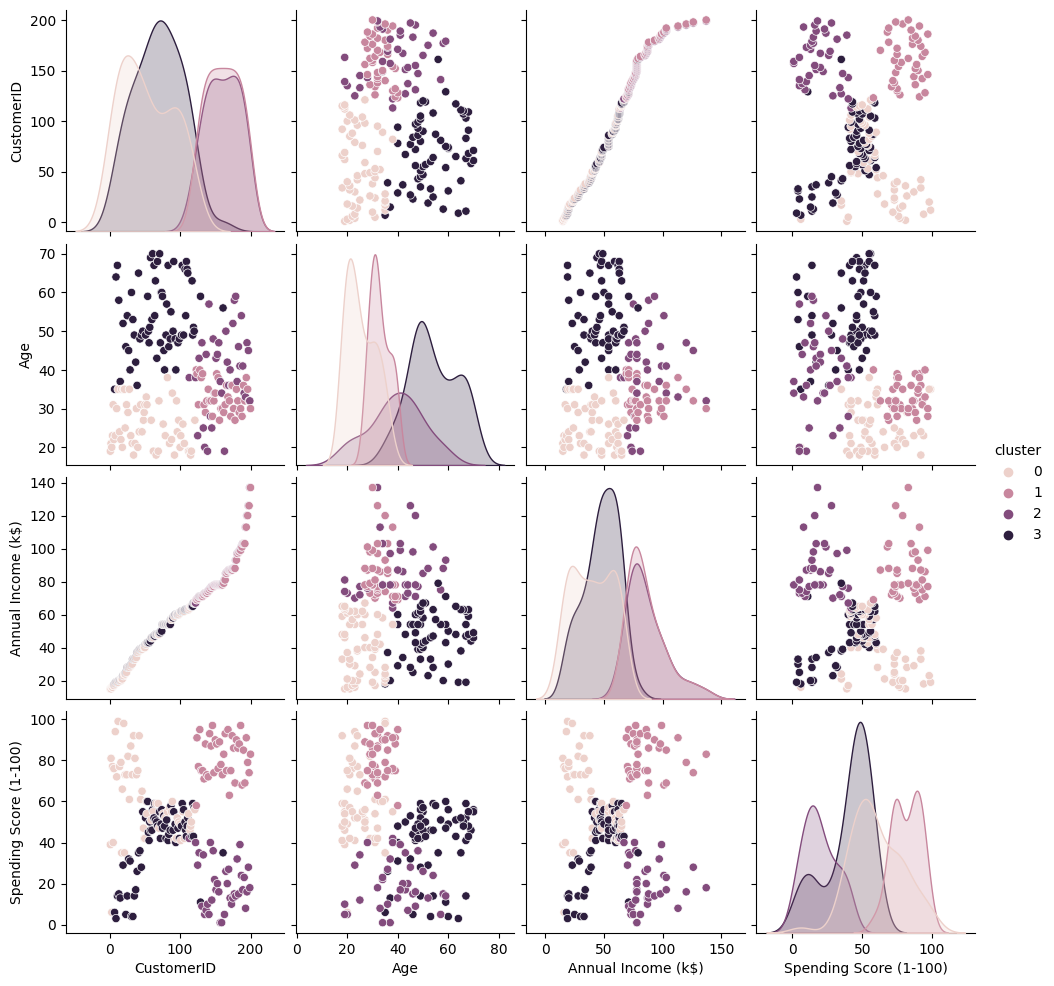

In [17]:
sns.pairplot(data, hue='cluster')
plt.show()